# Importing The Data

In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv(r"C:\Users\ranac\Downloads\train_u6lujuX_CVtuZ9i.csv")
df2 = pd.read_csv(r"C:\Users\ranac\Downloads\test_Y3wMUE5_7gLdaTN.csv")
print(df1.shape)
print(df2.shape)

(614, 13)
(367, 12)


In [6]:
df.columns                      #training data

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df2.columns                    #testing data

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Data Analysis

## & Dealing with Null values

In [9]:
print('Gender Mode: ',df['Gender'].mode())
print('Married mode: ',df['Married'].mode())
print('Self_Employed',df['Self_Employed'].mode())
print('Credit_History',df['Credit_History'].mode())

Gender Mode:  0    Male
Name: Gender, dtype: object
Married mode:  0    Yes
Name: Married, dtype: object
Self_Employed 0    No
Name: Self_Employed, dtype: object
Credit_History 0    1.0
Name: Credit_History, dtype: float64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ranac\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

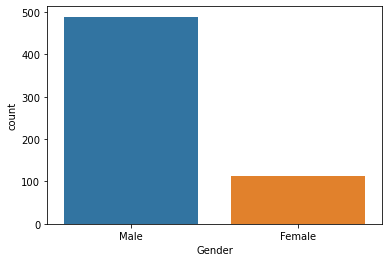

In [11]:
sns.countplot(df['Gender'])

#### Since most men are bread earner hence it's evident that they're more in number.

C:\Users\ranac\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

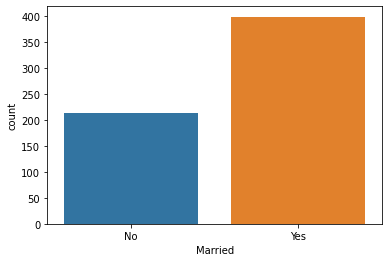

In [12]:
sns.countplot(df['Married'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

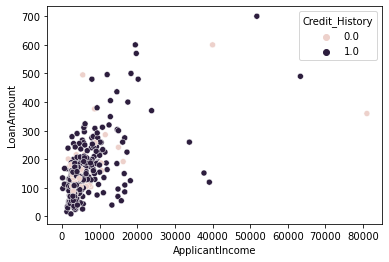

In [13]:
sns.scatterplot(x = 'ApplicantIncome' , y = 'LoanAmount' , hue = 'Credit_History' , data = df)

#### Applicant income and loan amount is linearly depedable and most of them have it.

C:\Users\ranac\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

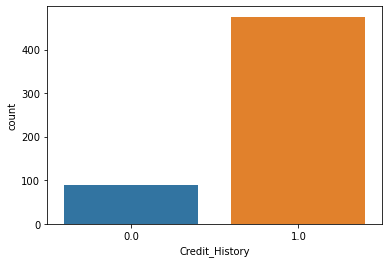

In [14]:
sns.countplot(df['Credit_History'])     

#### As we can see most applicants paid their previous loans.

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

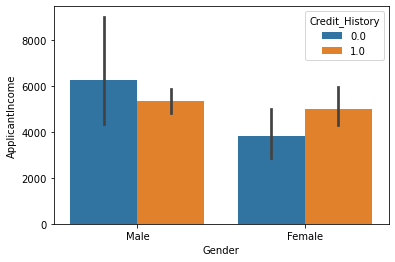

In [15]:
sns.barplot(x = 'Gender' , y = 'ApplicantIncome' , hue = 'Credit_History' , data = df)

#### gender is not much related to if the someone pays loan or not alsothe

In [16]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

C:\Users\ranac\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

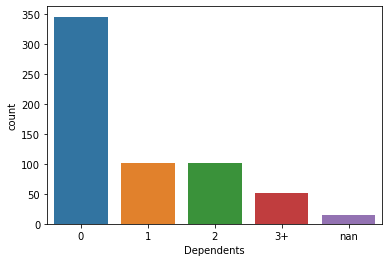

In [17]:
def func(x):
    return str(x)
df['Dependents'] =df['Dependents'].apply(func)
sns.countplot(df['Dependents']) 

#### Most of the peeps don't have any dependents.1 or 2 is the most common if any dependent

C:\Users\ranac\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

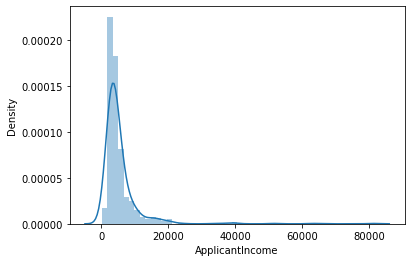

In [18]:
sns.distplot(df['ApplicantIncome'])

In [19]:
df['Gender'].fillna('Male',inplace=True)               #Cuz most are male   
df['Married'].fillna('Yes',inplace=True)              #Most are married
df['Self_Employed'].fillna('No',inplace=True)           #since most are not self employed.
df['LoanAmount'].fillna((df['LoanAmount'].mean()),inplace=True)
df['Loan_Amount_Term'].fillna((df['Loan_Amount_Term'].mean()),inplace=True)
df['Credit_History'].fillna(1.0,inplace=True)            #most pay but this will make our data rather more imbalanced ????
df['Dependents'].fillna(0,inplace=True)             #since mode is 0 or most o from the graph above 

In [20]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

C:\Users\ranac\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

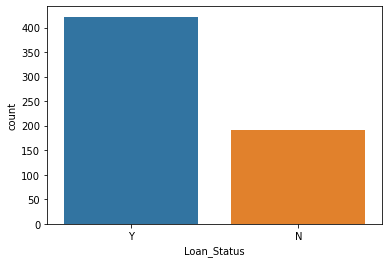

In [22]:
sns.countplot(df['Loan_Status'])                          #balanced dataset

In [23]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [24]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


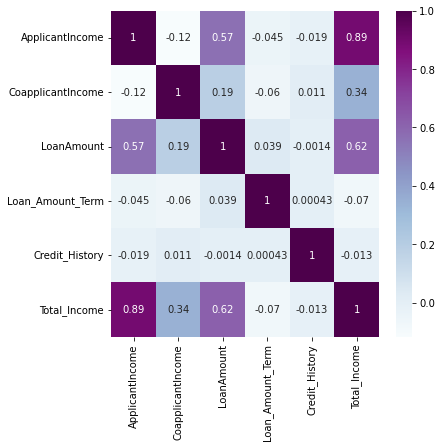

In [25]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap="BuPu")
plt.gcf().set_size_inches(6, 6)

### Log Transformation

#### Taking log brings the values on to a comparable scale and brings in “linearity” to the values

In [26]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
df['LoanAmountLog'] = np.log(df['LoanAmount'])
df['Loan_Amount_TermLog'] = np.log(df['Loan_Amount_Term'])
df['Total_IncomeLog'] = np.log(df['Total_Income'])

In [27]:
# dropping unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' ,'Loan_Amount_Term','Total_Income','Loan_ID','CoapplicantIncomeLog']
df = df.drop(columns = cols , axis = 1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_IncomeLog
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


### Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for col in cols :
    df[col] = le.fit_transform(df[col])
df.head()    

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_IncomeLog
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


### Train test split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns = ['Loan_Status'],axis =1),df['Loan_Status'],test_size=0.2,random_state=42)

## Model training and prediction

### Logistic Classification

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix
lor = LogisticRegression()
lor.fit(x_train,y_train)

LogisticRegression()

In [35]:
x_train_pred = lor.predict(x_train)
print('Accuracy score when trained on Logistic with training data is ', accuracy_score(x_train_pred , y_train))

Accuracy score when trained on training data is  0.814663951120163


### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
x_train_pred2 = dt.predict(x_train)
print('Accuracy score when trained on Decision tree with training data is ', accuracy_score(x_train_pred2 , y_train)) #Overfitting

Accuracy score when trained on Decision tree with training data is  1.0


### Random Forrest classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
x_train_pred3 = dt.predict(x_train)
print('Accuracy score when trained on Random Forrest with training data is ', accuracy_score(x_train_pred3 , y_train)) #Overfitting

Accuracy score when trained on Random Forrest with training data is  1.0


## Testing data

In [47]:
df2['Total_Income'] = df2['ApplicantIncome'] + df2['CoapplicantIncome']
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_Income
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,8.651724,0.000000,4.700480,5.886104,5720
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,8.031385,7.313887,4.836282,5.886104,4576
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,8.517193,7.496097,5.337538,5.886104,6800
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,7.757906,7.842671,4.605170,5.886104,4886
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,8.094378,0.000000,4.356709,5.886104,3276


In [48]:
df2['ApplicantIncomeLog'] = np.log(df2['ApplicantIncome'])
df2['CoapplicantIncomeLog'] = np.log(df2['CoapplicantIncome']+1)
df2['LoanAmountLog'] = np.log(df2['LoanAmount'])
df2['Loan_Amount_TermLog'] = np.log(df2['Loan_Amount_Term'])
df2['Total_IncomeLog'] = np.log(df2['Total_Income'])

C:\Users\ranac\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [49]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' ,'Loan_Amount_Term','Total_Income','Loan_ID','CoapplicantIncomeLog']
df2 = df2.drop(columns = cols , axis = 1)
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_IncomeLog
0,Male,Yes,0,Graduate,No,1.0,Urban,8.651724,4.700480,5.886104,8.651724
1,Male,Yes,1,Graduate,No,1.0,Urban,8.031385,4.836282,5.886104,8.428581
2,Male,Yes,2,Graduate,No,1.0,Urban,8.517193,5.337538,5.886104,8.824678
3,Male,Yes,2,Graduate,No,NaN,Urban,7.757906,4.605170,5.886104,8.494129
4,Male,No,0,Not Graduate,No,1.0,Urban,8.094378,4.356709,5.886104,8.094378


In [53]:
print('Accuracy score when trained on Logistic with testing data is ', accuracy_score(lor.predict(x_test) , y_test))
print('Accuracy score when trained on Decision tree with testing data is ', accuracy_score(dt.predict(x_test) , y_test))
print('Accuracy score when trained on Random Forrest with testing data is ', accuracy_score(rf.predict(x_test) , y_test))

Accuracy score when trained on Logistic with training data is  0.7886178861788617
Accuracy score when trained on Decision tree with training data is  0.7073170731707317
Accuracy score when trained on Random Forrest with training data is  0.7560975609756098


In [55]:
df3 = pd.concat([df , df1])
print(df3.shape)
print(df.shape)
print(df1.shape)

(1228, 17)
(614, 12)
(614, 13)


In [56]:
# Accuracy isn't bad . for binary classification , Logistic Works great !!

<AxesSubplot:>

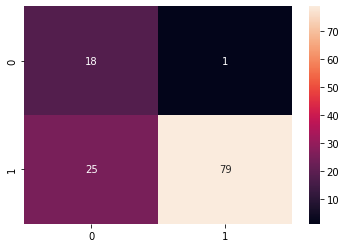

In [60]:
cm = confusion_matrix(lor.predict(x_test) , y_test)
sns.heatmap(cm,annot=True)
